In [23]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
                            confusion_matrix, 
                            f1_score,
                            accuracy_score,
                            precision_score,
                            recall_score
                            )
warnings.filterwarnings('ignore')

In [24]:
seed = 42
np.random.seed(seed)

### Quick Overview of Logistic Regression 

Y_hat(Z) = 1 / (1 + exp(-Z))

P(Y = 1 | X) = Y_hat(Z)

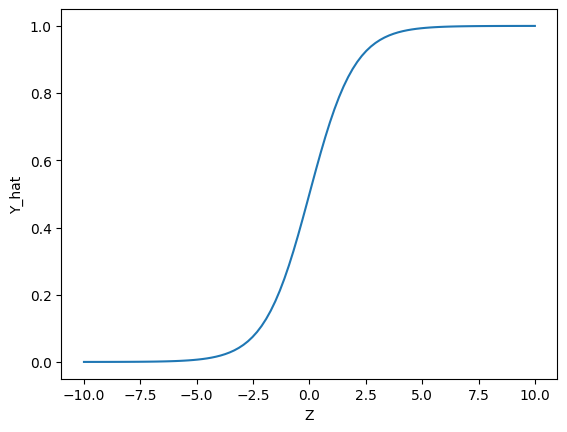

In [25]:
def sigmoid(Z):
    return 1 / (1 + np.exp(-Z))

X_linespace = np.linspace(-10, 10, 100)
Y_hat = sigmoid(X_linespace)

plt.plot(X_linespace, Y_hat)
plt.xlabel('Z')
plt.ylabel('Y_hat')
plt.show()

### Loading the Data 

In [26]:
X_train = np.load("./artifacts/X_train_resampled.npz", allow_pickle=True)['arr_0']
Y_train = np.load("./artifacts/Y_train_resampled.npz", allow_pickle=True)['arr_0']
X_test = np.load('./artifacts/X_test.npz', allow_pickle=True)['arr_0']
Y_test = np.load('./artifacts/Y_test.npz', allow_pickle=True)['arr_0']

### Model Training 

In [27]:
model_lr = LogisticRegression(
                            random_state = 42,
                            max_iter = 1000      
                            )
model_lr.fit(X_train, Y_train)

LogisticRegression(max_iter=1000, random_state=42)

### Inference

Y_hat = Y_hat_proba > 0.5

In [28]:
Y_proba_train = model_lr.predict_proba(X_train)
Y_proba_test = model_lr.predict_proba(X_test)

In [29]:
pd.Series(Y_test).value_counts()

0    1607
1     393
Name: count, dtype: int64

- we can see there is a huge class imbalance in the test data set

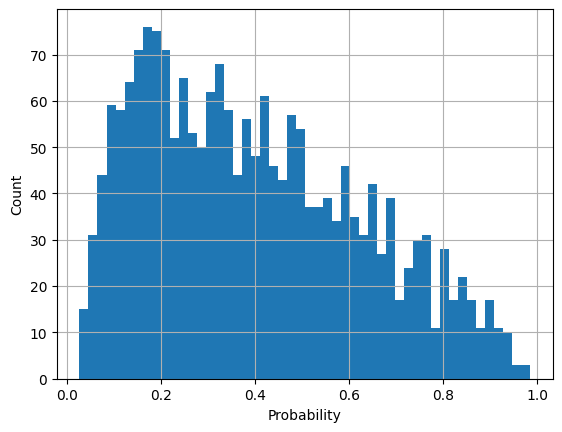

In [30]:
Y_lr_test =  Y_proba_test[:, 1]

plt.hist(Y_lr_test, bins=50)
plt.xlabel('Probability')
plt.ylabel('Count')
plt.grid(True)
plt.show()

In [31]:
# Y_lr_test =  Y_proba_test[:, 0]

# plt.hist(Y_lr_test, bins=50)
# plt.xlabel('Probability')
# plt.ylabel('Count')
# plt.grid(True)
# plt.show()

Model output: LogisticRegression gives two numbers per sample: [P(class 0), P(class 1)]. They sum to 1.

Default decision: Predict class 1 if P(class 1) > 0.5 (equivalent to P(class 1) > P(class 0)).

Threshold meaning: The threshold is the minimum probability you require before calling it class 1.

Raise threshold (e.g. 0.65): Stricter. Fewer positives predicted. Precision goes up (usually), recall goes down.

Lower threshold (e.g. 0.30): Looser. More positives predicted. Recall goes up, precision goes down.

Why change it: Class imbalance, different business costs (missing a positive vs false alarm), maximize a metric (F1, recall, precision, profit).

What you MUST apply threshold to: The positive class probability (second column: probs[:, 1]). Do not threshold the class 0 column.

Argmax vs threshold: For two classes, argmax is the same as using threshold 0.5 on P(class 1).

Example: P(class 1)=0.60

- Threshold 0.5 → predict 1
- Threshold 0.65 → predict 0 (not confident enough, even though P(class 1) > P(class 0), to predict as 1 P(class 1) must be > 0.65)

Trade‑off summary:

Higher threshold → safer, miss more real positives
Lower threshold → catch more positives, more false alarms
How to pick a good threshold: Try many thresholds and pick the one that maximizes a metric you care about.

Common pitfall: Accidentally using P(class 0) when applying a “positive” threshold (reverses logic).

Communicate to others: “Threshold optimization is choosing how confident the model must be before we accept a positive. We adjust it to balance missed cases vs false alarms.”

### Evaluation

In [36]:
Y_hat_test = Y_lr_test > 0.8
Y_hat_test

array([False, False, False, ..., False, False, False], shape=(2000,))

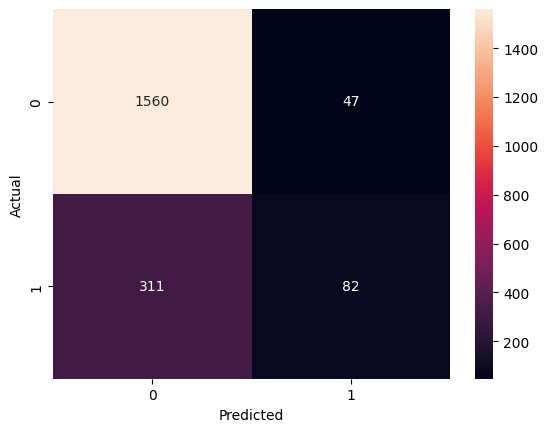

In [37]:
cm = confusion_matrix(Y_test, Y_hat_test)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()